HESTON MODEL CALIBRATION

In [1]:
import QuantLib as ql
import math
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(15,7)
plt.style.use("dark_background")
from matplotlib import cm

In [2]:
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates(m=1)

calculation_date = ql.Date(9, 11, 2021)
spot = 659.37
ql.Settings.instance().evaluationDate = calculation_date

In [3]:
dividend_yield = ql.QuoteHandle(ql.SimpleQuote(0.0))
risk_free_rate = 0.01
dividend_rate = 0.00
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))

In [4]:
expiration_dates = [ql.Date(9,12,2021), ql.Date(9,1,2022), ql.Date(9,2,2022),
                    ql.Date(9,3,2022), ql.Date(9,4,2022), ql.Date(9,5,2022),
                    ql.Date(9,6,2022), ql.Date(9,7,2022), ql.Date(9,8,2022),
                    ql.Date(9,9,2022), ql.Date(9,10,2022), ql.Date(9,11,2022),
                    ql.Date(9,12,2022), ql.Date(9,1,2023), ql.Date(9,2,2023),
                    ql.Date(9,3,2023), ql.Date(9,4,2023), ql.Date(9,5,2023),
                    ql.Date(9,6,2023), ql.Date(9,7,2023), ql.Date(9,8,2023),
                    ql.Date(9,9,2023), ql.Date(9,10,2023), ql.Date(9,11,2023)]
strikes = [527.50, 560.46, 593.43, 626.40, 659.37, 692.34, 725.31, 758.28]
data = [
[0.37819, 0.34177, 0.30394, 0.27832, 0.26453, 0.25916, 0.25941, 0.26127],
[0.3445, 0.31769, 0.2933, 0.27614, 0.26575, 0.25729, 0.25228, 0.25202],
[0.37419, 0.35372, 0.33729, 0.32492, 0.31601, 0.30883, 0.30036, 0.29568],
[0.37498, 0.35847, 0.34475, 0.33399, 0.32715, 0.31943, 0.31098, 0.30506],
[0.35941, 0.34516, 0.33296, 0.32275, 0.31867, 0.30969, 0.30239, 0.29631],
[0.35521, 0.34242, 0.33154, 0.3219, 0.31948, 0.31096, 0.30424, 0.2984],
[0.35442, 0.34267, 0.33288, 0.32374, 0.32245, 0.31474, 0.30838, 0.30283],
[0.35384, 0.34286, 0.33386, 0.32507, 0.3246, 0.31745, 0.31135, 0.306],
[0.35338, 0.343, 0.33464, 0.32614, 0.3263, 0.31961, 0.31371, 0.30852],
[0.35301, 0.34312, 0.33526, 0.32698, 0.32766, 0.32132, 0.31558, 0.31052],
[0.35272, 0.34322, 0.33574, 0.32765, 0.32873, 0.32267, 0.31705, 0.31209],
[0.35246, 0.3433, 0.33617, 0.32822, 0.32965, 0.32383, 0.31831, 0.31344],
[0.35226, 0.34336, 0.33651, 0.32869, 0.3304, 0.32477, 0.31934, 0.31453],
[0.35207, 0.34342, 0.33681, 0.32911, 0.33106, 0.32561, 0.32025, 0.3155],
[0.35171, 0.34327, 0.33679, 0.32931, 0.3319, 0.32665, 0.32139, 0.31675],
[0.35128, 0.343, 0.33658, 0.32937, 0.33276, 0.32769, 0.32255, 0.31802],
[0.35086, 0.34274, 0.33637, 0.32943, 0.3336, 0.32872, 0.32368, 0.31927],
[0.35049, 0.34252, 0.33618, 0.32948, 0.33432, 0.32959, 0.32465, 0.32034],
[0.35016, 0.34231, 0.33602, 0.32953, 0.33498, 0.3304, 0.32554, 0.32132],
[0.34986, 0.34213, 0.33587, 0.32957, 0.33556, 0.3311, 0.32631, 0.32217],
[0.34959, 0.34196, 0.33573, 0.32961, 0.3361, 0.33176, 0.32704, 0.32296],
[0.34934, 0.34181, 0.33561, 0.32964, 0.33658, 0.33235, 0.32769, 0.32368],
[0.34912, 0.34167, 0.3355, 0.32967, 0.33701, 0.33288, 0.32827, 0.32432],
[0.34891, 0.34154, 0.33539, 0.3297, 0.33742, 0.33337, 0.32881, 0.32492]]
implied_vols = ql.Matrix(len(strikes), len(expiration_dates))

In [5]:
for i in range(implied_vols.rows()):
    for j in range(implied_vols.columns()):
        implied_vols[i][j] = data[j][i]
black_var_surface = ql.BlackVarianceSurface(
    calculation_date, calendar,
    expiration_dates, strikes,
    implied_vols, day_count)

strikes_grid = np.arange(strikes[0], strikes[-1],10)
expiry = 1.0 # years
implied_vols = [black_var_surface.blackVol(expiry, s)
                for s in strikes_grid] # can interpolate here
actual_data = data[11] # cherry picked the data for given expiry (1 year)

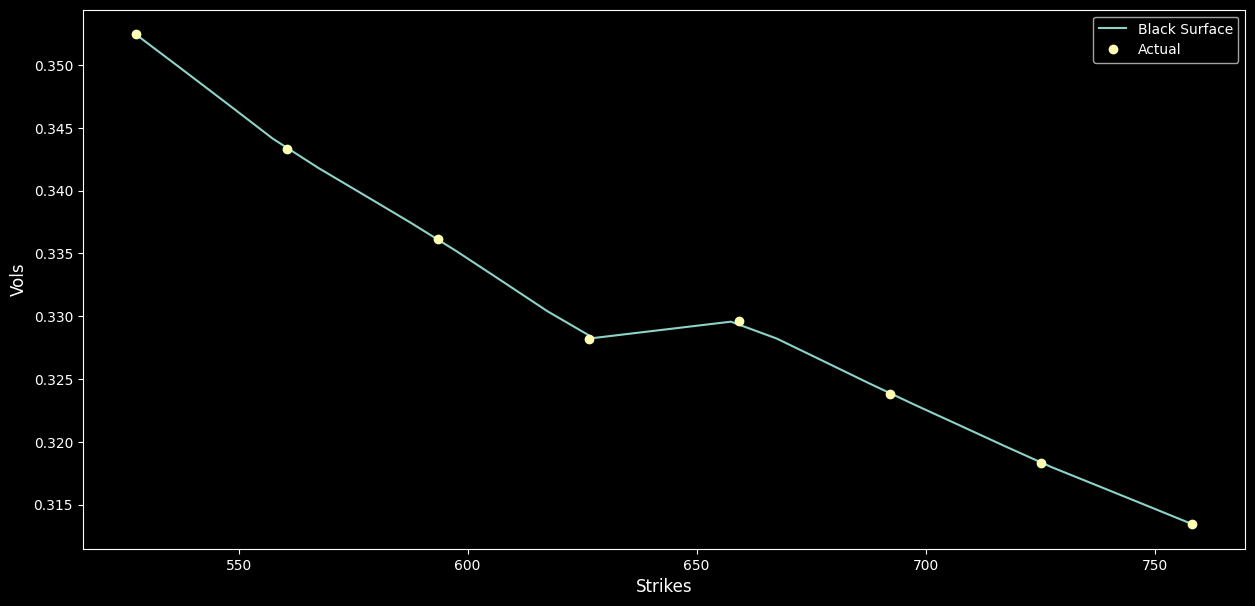

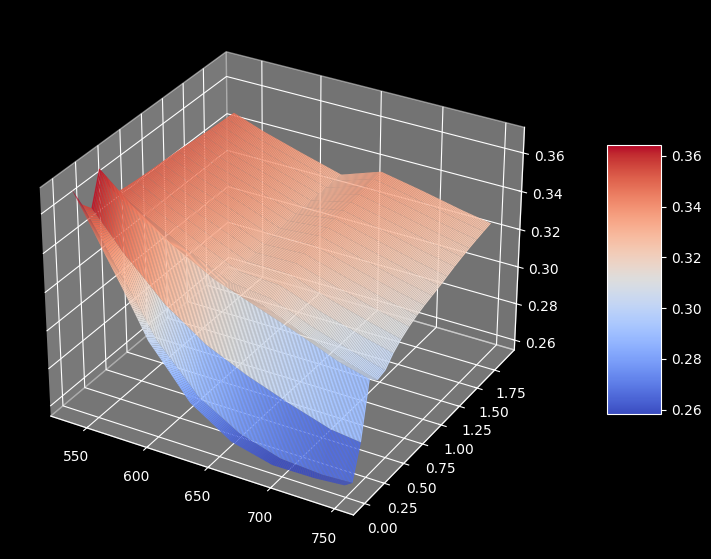

In [6]:
fig, ax = plt.subplots()
ax.plot(strikes_grid, implied_vols, label="Black Surface")
ax.plot(strikes, actual_data, "o", label="Actual")
ax.set_xlabel("Strikes", size=12)
ax.set_ylabel("Vols", size=12)
legend = ax.legend(loc="upper right")
plot_years = np.arange(0, 2, 0.1)
plot_strikes = np.arange(535.0, 750.0, 1.0)
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
X, Y = np.meshgrid(plot_strikes, plot_years)

Z = np.array([black_var_surface.blackVol(y, x)
              for xr, yr in zip(X, Y)
                  for x, y in zip(xr,yr) ]
             ).reshape(len(X), len(X[0]))

surf = ax.plot_surface(X,Y,Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [7]:
# dummy parameters
v0 = 0.01; kappa = 0.2; theta = 0.02; rho = -0.75; sigma = 0.5;

process = ql.HestonProcess(flat_ts, dividend_ts,
                           ql.QuoteHandle(ql.SimpleQuote(spot)),
                           v0, kappa, theta, sigma, rho)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model)
heston_helpers = []
black_var_surface.setInterpolation("bicubic")
one_year_idx = 11 # 12th row in data is for 1 year expiry
date = expiration_dates[one_year_idx]
for j, s in enumerate(strikes):
    t = (date - calculation_date )
    p = ql.Period(t, ql.Days)
    sigma = data[one_year_idx][j]
    #sigma = black_var_surface.blackVol(t/365.25, s)
    helper = ql.HestonModelHelper(p, calendar, spot, s,
                                  ql.QuoteHandle(ql.SimpleQuote(sigma)),
                                  flat_ts,
                                  dividend_ts)
    helper.setPricingEngine(engine)
    heston_helpers.append(helper)
lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)
model.calibrate(heston_helpers, lm,
                 ql.EndCriteria(500, 50, 1.0e-8,1.0e-8, 1.0e-8))
theta, kappa, sigma, rho, v0 = model.params()

print ("\ntheta = %f, kappa = %f, sigma = %f, rho = %f, v0 = %f" % (theta, kappa, sigma, rho, v0))
avg = 0.0

print ("%15s %15s %15s %20s" % (
    "Strikes", "Market Value",
     "Model Value", "Relative Error (%)"))
print ("="*70)
for i, opt in enumerate(heston_helpers):
    err = (opt.modelValue()/opt.marketValue() - 1.0)
    print ("%15.2f %14.5f %15.5f %20.7f " % (
        strikes[i], opt.marketValue(),
        opt.modelValue(),
        100.0*(opt.modelValue()/opt.marketValue() - 1.0)))
    avg += abs(err)
avg = avg*100.0/len(heston_helpers)
print ("-"*70)
print ("Average Abs Error (%%) : %5.3f" % (avg))


theta = 0.132287, kappa = 11.068378, sigma = 4.013661, rho = -0.351474, v0 = 0.063195
        Strikes    Market Value     Model Value   Relative Error (%)
         527.50       44.38769        44.17562           -0.4777731 
         560.46       54.74323        54.92270            0.3278493 
         593.43       67.04742        67.34058            0.4372445 
         626.40       80.60283        81.49350            1.1050164 
         659.37       98.54781        97.41347           -1.1510548 
         692.34       92.88503        92.14150           -0.8004802 
         725.31       79.24332        79.04275           -0.2531082 
         758.28       67.22691        67.57597            0.5192316 
----------------------------------------------------------------------
Average Abs Error (%) : 0.634
